In [1]:
from imutils import paths
import matplotlib.pyplot as plt
import argparse
import time
import sys
import cv2
import os


In [91]:
def dhash(image, hashSize=64):
    # resize the input image, adding a single column (width) so we
    # can compute the horizontal gradient
    resized = cv2.resize(image, (hashSize + 1, hashSize))
 
    # compute the (relative) horizontal gradient between adjacent
    # column pixels
    diff = resized[:, 1:] > resized[:, :-1]
    #plt.imshow(diff,cmap='gray')
    #plt.show()
    # convert the difference image to a hash
    return sum([2 ** i for (i, v) in enumerate(diff.flatten()) if v])

In [92]:
def hamming_distance(hash1, hash2):
    
    #this function compares the two hashes bitwise
    #returns the amount of bits that are different
    hash1_binary = "{0:b}".format(hash1)
    #print(hash1_binary)
    hash2_binary = "{0:b}".format(hash2)
    #print(hash2_binary)
    return sum(c1 != c2 for c1, c2 in zip(hash1_binary, hash2_binary))

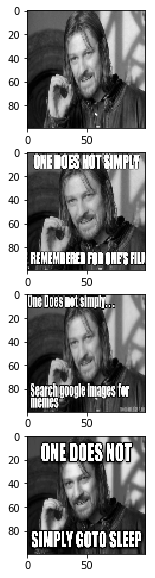

In [121]:
image1 = cv2.imread('odns_original.jpg')
image1 = cv2.cvtColor(image1, cv2.COLOR_BGR2GRAY)
image2 = cv2.imread('odns_01.jpg')
image2 = cv2.cvtColor(image2, cv2.COLOR_BGR2GRAY)
image3 = cv2.imread('odns_02.jpg')
image3 = cv2.cvtColor(image3, cv2.COLOR_BGR2GRAY)
image4 = cv2.imread('odns_03.jpg')
image4 = cv2.cvtColor(image4, cv2.COLOR_BGR2GRAY)
fig,ax = plt.subplots(4)
fig.set_size_inches(10,10)
ax[0].imshow(cv2.resize(image1,(100,100)),cmap='gray')
ax[1].imshow(cv2.resize(image2,(100,100)),cmap='gray')
ax[2].imshow(cv2.resize(image3,(100,100)),cmap='gray')
ax[3].imshow(cv2.resize(image4,(100,100)),cmap='gray')
plt.show()

In [94]:
print(hamming_distance(hash1,hash2)/len("{0:b}".format(hash1)))
print(hamming_distance(hash1,hash3)/len("{0:b}".format(hash1)))
print(hamming_distance(hash1,hash4)/len("{0:b}".format(hash1)))
print(hamming_distance(hash2,hash3)/len("{0:b}".format(hash2)))
print(hamming_distance(hash2,hash4)/len("{0:b}".format(hash1)))
print(hamming_distance(hash3,hash4)/len("{0:b}".format(hash3)))

0.4794921875
0.1416015625
0.4677734375
0.484375
0.453125
0.4765625
